# 1. Importing Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score


# 2. Load and Overview the Dataset

In [2]:
# Load the dataset
file_path = 'Heart.csv'  # Replace with the correct path to your dataset
data = pd.read_csv(file_path)

# Display dataset information
print("Dataset Shape:", data.shape)
print("\nDataset Info:")
print(data.info())
print("\nMissing Values:\n", data.isnull().sum())
print("\nSummary Statistics:")
print(data.describe())


Dataset Shape: (1025, 14)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None

Missing Values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       

# 3. Preprocessing

In [3]:
# Identify categorical and numerical columns
categorical_cols = ['cp', 'slope', 'thal']
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# One-Hot Encoding for categorical columns
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_features = pd.DataFrame(
    encoder.fit_transform(data[categorical_cols]),
    columns=encoder.get_feature_names_out(categorical_cols)
)

# Drop original categorical columns and concatenate encoded features
data = data.drop(categorical_cols, axis=1)
data = pd.concat([data, encoded_features], axis=1)

# Standard Scaling for numerical columns
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Define features and target
X = data.drop('target', axis=1)
y = data['target']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 4. Gradient Boosting Classifier

In [4]:
# Initialize and train the Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = gb.predict(X_test)


# 5. Evaluating Classification Metrics

Accuracy: 0.96
Precision: 0.99
Recall: 0.93
F1 Score: 0.96
ROC-AUC Score: 0.99

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       102
           1       0.99      0.93      0.96       103

    accuracy                           0.96       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205


Confusion Matrix:


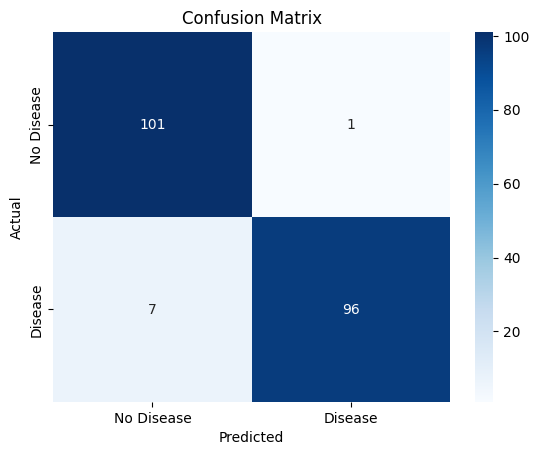

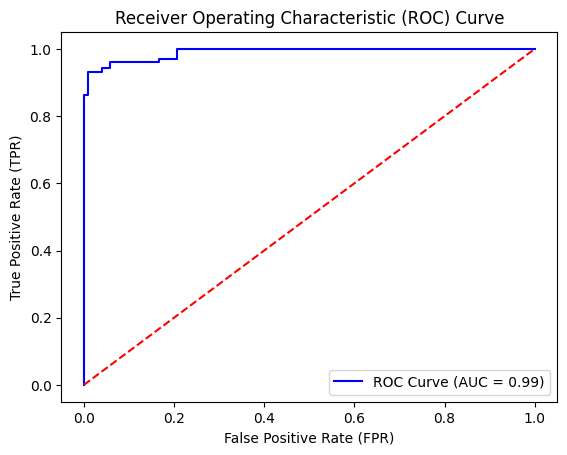

In [6]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    confusion_matrix,
    roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions
y_pred_gb = gb.predict(X_test)
y_pred_proba = gb.predict_proba(X_test)[:, 1]  # Probabilities for ROC/AUC

# 1. Accuracy
accuracy = accuracy_score(y_test, y_pred_gb)
print(f"Accuracy: {accuracy:.2f}")

# 2. Precision
precision = precision_score(y_test, y_pred_gb)
print(f"Precision: {precision:.2f}")

# 3. Recall
recall = recall_score(y_test, y_pred_gb)
print(f"Recall: {recall:.2f}")

# 4. F1 Score
f1 = f1_score(y_test, y_pred_gb)
print(f"F1 Score: {f1:.2f}")

# 5. ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc:.2f}")

# 6. Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gb))

# 7. Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 8. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="red", linestyle="--")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend()
plt.show()
